# Visualization Exercises
----

There are multiple ways, across multiple packages, to complete these exercises.  Some answers are given, but there are other possibilities.  

Note: if you have better solutions to these please [let me know](mailto:christina.maimone@northwestern.edu).

## Imports

A few imports to avoid having to do them for each exercise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import datetime as dt
import matplotlib.dates as dates

import seaborn as sns

%matplotlib inline

## Get Some Data

The first exercises use data from [Gapminder](http://www.gapminder.org). Read `gapminder_5y_tidy.csv` from https://github.com/nuitrcs/pythonworkshops/raw/master/dataanalysis/datasets/gapminder_5y_tidy.csv (or the datasets directory of the repository) into a pandas data frame called `gapminder`.  Look at the first few observations.

In [2]:
gapminder = pd.read_csv("../datasets/gapminder_5y_tidy.csv")
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


## Exercise: Scatter Plot

Using the `gapminder` data, plot life expectancy (`lifeExp`) vs. GDP per capita (`gdpPercap`) for the year 2002.  Make sure to label the axes and give the plot a title.

Challenge: Redo the plot, coloring the points by continent.  Make sure to add a legend.  Hint: there are a few ways to do this.  If you get stuck, take a look at https://matplotlib.org/examples/lines_bars_and_markers/scatter_with_legend.html or https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib for some approaches.  Hint 2: This may be easiest using Seaborn

Challenge (not contingent on the challenge above): Redo the plot and change the gdp axes to be on a log scale.

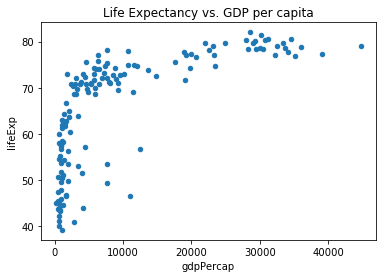

In [3]:
# pandas
gapminder[gapminder['year']==2002].plot('gdpPercap', 'lifeExp', kind="scatter", 
                                       title="Life Expectancy vs. GDP per capita");

If you want to change the x and y labels, use `matplotlib`:

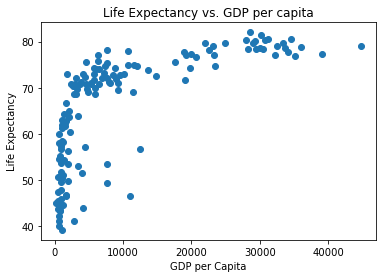

In [4]:
#matplotlib
pts = plt.scatter(gapminder.loc[gapminder['year']==2002, 'gdpPercap'],
                  gapminder.loc[gapminder['year']==2002, 'lifeExp']) 
plt.ylabel("Life Expectancy")
plt.xlabel("GDP per Capita")
plt.title("Life Expectancy vs. GDP per capita");

To color by continent

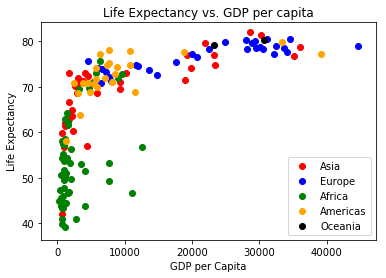

In [5]:
# matplotlib
colors = {'Asia':'red','Europe':'blue','Africa':'green','Americas':'orange','Oceania':'black'}
fig, ax = plt.subplots()
for continent, color in colors.items():
    ax.scatter(gapminder.loc[(gapminder['year']==2002) & 
                             (gapminder['continent']==continent), 'gdpPercap'],
                  gapminder.loc[(gapminder['year']==2002) & 
                             (gapminder['continent']==continent), 'lifeExp'],
                  c=color, label=continent) 
plt.ylabel("Life Expectancy")
plt.xlabel("GDP per Capita")
plt.title("Life Expectancy vs. GDP per capita");
plt.legend();

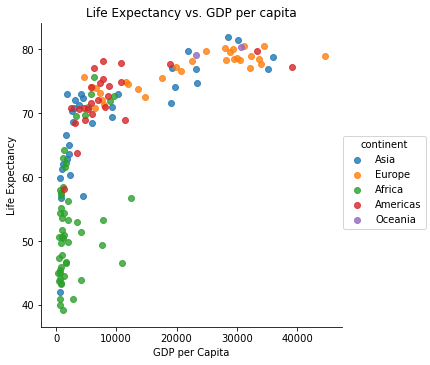

In [6]:
# seaborn
sns.lmplot(x='gdpPercap', y='lifeExp', hue='continent', 
           data=gapminder[gapminder['year']==2002],
              fit_reg=False)
plt.ylabel("Life Expectancy")
plt.xlabel("GDP per Capita")
plt.title("Life Expectancy vs. GDP per capita");

Change the axis to log scale:

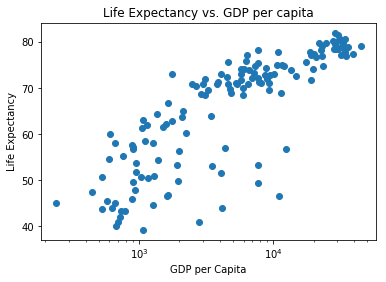

In [7]:
#matplotlib
fix, ax = plt.subplots()
ax.scatter(gapminder.loc[gapminder['year']==2002, 'gdpPercap'],
                  gapminder.loc[gapminder['year']==2002, 'lifeExp']) 
plt.ylabel("Life Expectancy")
plt.xlabel("GDP per Capita")
plt.title("Life Expectancy vs. GDP per capita")
ax.set_xscale('log')

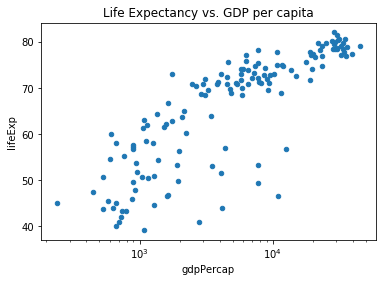

In [8]:
# pandas
gapminder[gapminder['year']==2002].plot('gdpPercap', 'lifeExp', kind="scatter", 
                                       title="Life Expectancy vs. GDP per capita",
                                       logx=True);

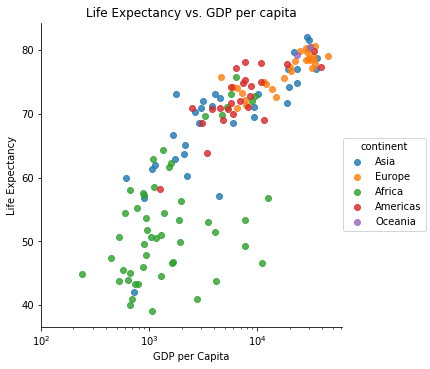

In [9]:
# seaborn
p1 = sns.lmplot(x='gdpPercap', y='lifeExp', hue='continent', 
           data=gapminder[gapminder['year']==2002],
              fit_reg=False)
plt.ylabel("Life Expectancy")
plt.xlabel("GDP per Capita")
plt.title("Life Expectancy vs. GDP per capita")
p1.ax.set_xscale('log')

## Exercise: Line Plot

Using the gapminder data, plot the average life expectancy in Asia (average across countries) over time.

Hint: if you use `groupby` in calculating the mean, the groups become the index of the data frame.  You can use function `reset_index()` to make an index into a column again that you can use.

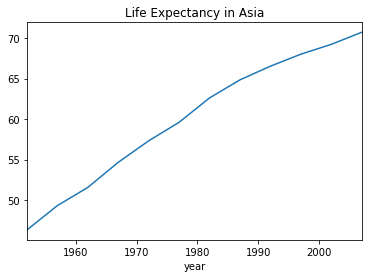

In [10]:
stats = gapminder[gapminder['continent']=='Asia'].groupby('year').mean()
stats=stats.reset_index() # to get index back as a column
stats.plot(x='year',y='lifeExp', legend=False, title="Life Expectancy in Asia");

## Exercise: Box Plot

Using the gapminder data, make a box plot of life expectancy by continent for the year 2002.  Hint: use Seaborn

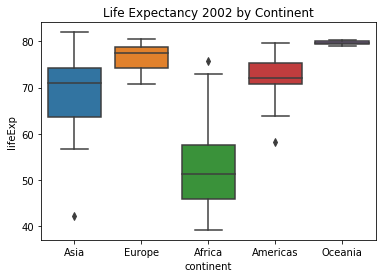

In [11]:
p1 = sns.boxplot(y='lifeExp',x='continent', data=gapminder.loc[gapminder['year']==2002])
p1.set_title("Life Expectancy 2002 by Continent");

## Exercise: Heat Map

Using Seaborn and the gapminder data, make a heat map of a matrix with years as columns, continents as rows, and average life expectancy as the cell value.

Hint: the trick here is getting the data in the right format; you may need to `unstack` some grouped data.

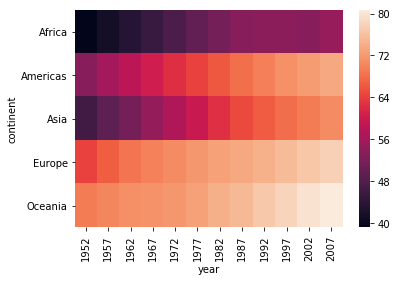

In [12]:
grouped = gapminder.groupby(['year','continent']).mean()
grouped = grouped['lifeExp']
grouped = grouped.unstack(level=0)
sns.heatmap(grouped);

## Challenging Exercise: Replicate a Plot

Replicate the plot below using matplotlib.  Some code is provided for categories, colors, and offsets.  The steps are to help guide you to some of the steps involved, but you may instead want to start by making a basic version of the plot and then adding in steps to clean it up.  This exercise is really about steps you can take to make a plot look better and convey information more effectively.

![degrees](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.png)

Some steps/notes:

* You typically want a plot to be ~1.33x wider than tall. This plot is a rare exception because of the number of lines being plotted on it.  Size: 12 x 14   
  
* Remove the plot frame lines. They are unnecessary.    
  
* Ensure that the axis ticks only show up on the bottom and left of the plot.  Ticks on the right and top of the plot are generally unnecessary.    
   
* Limit the range of the plot to only where the data is.  Avoid unnecessary whitespace.    
   
* Make sure your axis ticks are large enough to be easily read.  You don't want your viewers squinting to read your plot.  Format your y axis labels with a %
       
* Provide tick lines (dotted grid lines) across the plot to help your viewers trace along the axis ticks. Make sure that the lines are light and small so they don't obscure the primary data lines. Then remove the tick marks; they are unnecessary with the tick lines we just plotted. 

* Make sure plot labels are big enough to read

* Create the title using `text()` instead of `title()` so you can control the positioning


In [13]:
gender_degree_data = pd.read_csv("http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv")    
  
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
       
# majors in order of the highest % in the final year.    
majors = ['Health Professions', 'Public Administration', 'Education', 'Psychology',    
          'Foreign Languages', 'English', 'Communications\nand Journalism',    
          'Art and Performance', 'Biology', 'Agriculture',    
          'Social Sciences and History', 'Business', 'Math and Statistics',    
          'Architecture', 'Physical Sciences', 'Computer Science',    
          'Engineering']    

# You'll want to set up the plot here

# Actually plot
for rank, column in enumerate(majors):    
    # Replace the line below with code to actually draw each line.
    # rank gives you an index 0, 1, ...
    pass;
  
    # Add text labels for each line
    # To get the text labels positioned nicely, you may need to 
    # offset them a bit to keep them from overlapping
    y_pos = 0 # replace 0 with an expression to get the end of each line
    
    # you may need to adjust these, but they are what the plot author used originally
    if column == "Foreign Languages":    
        y_pos += 0.5    
    elif column == "English":    
        y_pos -= 0.5    
    elif column == "Communications\nand Journalism":    
        y_pos += 0.75    
    elif column == "Art and Performance":    
        y_pos -= 0.25    
    elif column == "Agriculture":    
        y_pos += 1.25    
    elif column == "Social Sciences and History":    
        y_pos += 0.25    
    elif column == "Business":    
        y_pos -= 0.75    
    elif column == "Math and Statistics":    
        y_pos += 0.75    
    elif column == "Architecture":    
        y_pos -= 0.75    
    elif column == "Computer Science":    
        y_pos += 0.75    
    elif column == "Engineering":    
        y_pos -= 0.25    
   
    # create the label now that you know where it goes

# you might have some finishing touches to do down here

This exercise is taken from http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/ and the full answer is there.

## Exercise: Interpolated 3D Surace from Points

Generate 20 random points in 3 dimensions and plot them in 3D.  

Then change the orientation (tilt, rotation) of the plot to a pleasing angle.  [hint](https://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html)

Challenge: Then use the points to interpolate a 3D surface and plot that (interpolate z given x and y). [hint](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.griddata.html)  

You may want to investigate effects of different grid sizes and interpolation methods.

In [14]:
pts = np.random.randn(20,3)

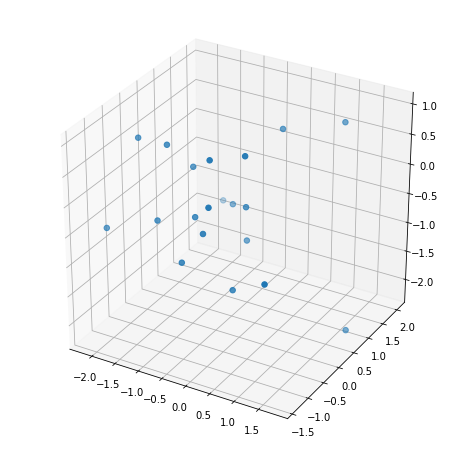

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], s=30);

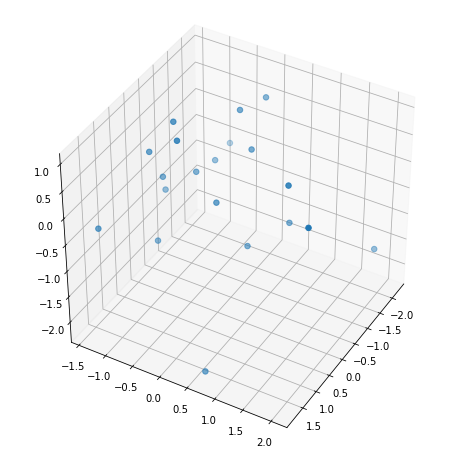

In [16]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], s=30);
ax.view_init(azim=30, elev=40)

In [17]:
from scipy.interpolate import griddata

gridx, gridy = np.mgrid[-2:2:50j, -2:2:50j]
gridz = griddata(pts[:, :2],pts[:, 2], (gridx, gridy),
            method='cubic')

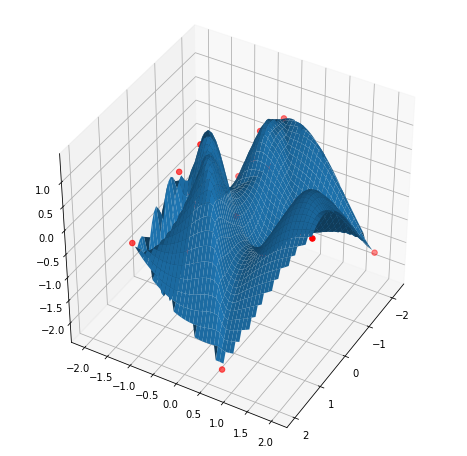

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], s=30, c="red");
ax.plot_surface(gridx, gridy, gridz)
ax.view_init(azim=30, elev=40)

## Exercise: xkcd for fun (and learning styling and annotations)

Can you produce [this xkcd comic](https://imgs.xkcd.com/comics/self_description.png) in `matplotlib`?  A copy is in the repository as `xkcd.png`.  There's an xkcd style for `matplotlib`.  

![chartviz](xkcd.png)

Notes:
* For the first panel, you might not be able to get the lines from the text to the plot exactly like the reference image with the `annotate` function, but you can get close.  
* For panel 3, putting arrows on the spines (axis lines) doesn't work well with the XKCD style, so you might want to skip that (the solution skips it -- if you find a way other than manually drawing arrow heads, [let me know](mailto:christina.maimone@northwestern.edu)).
* Drawing a border around each subplot is a manual process (no built in matplotlib function) so skip that.

Plot produced by the solution looks like:

![chartviz](xkcd_solution.png)

(If you come up with a better answer, [let me know](mailto:christina.maimone@northwestern.edu).)

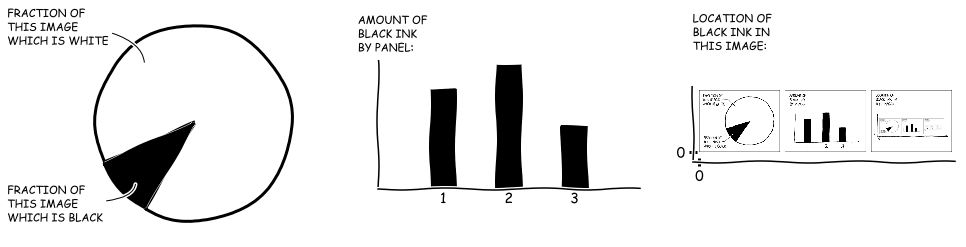

In [20]:
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle

plt.xkcd()
fig = plt.figure(figsize=(16,4))

# First Panel
ax1 = fig.add_subplot(1, 3, 1)
wedges, texts = ax1.pie([90, 10], startangle=240, colors=['white','black'])
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

# to get an outline
for w in wedges:
    w.set_linewidth(3)
    w.set_edgecolor('black')
    
ax1.annotate('FRACTION OF\nTHIS IMAGE\nWHICH IS WHITE', xy=(-.5,.6), xytext=(-1.9, .8),
            size=11,
            arrowprops=dict(facecolor='black', arrowstyle='-',
                             connectionstyle="angle3, angleA=0, angleB=90"));
ax1.annotate('FRACTION OF\nTHIS IMAGE\nWHICH IS BLACK', xy=(-.6,-.6), xytext=(-1.9, -1),
           size=11, arrowprops=dict(facecolor='black', arrowstyle='-',
                             connectionstyle="angle3, angleA=0, angleB=-90")); 

# Second Panel
ax2 = fig.add_subplot(1, 3, 2)
ax2.bar([1,2,3], [.8,1,.5], width=.4, tick_label=['1','2','3'], 
        color="black")
ax2.text(-.3, 1.1, "AMOUNT OF\nBLACK INK\nBY PANEL:", size=11)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
plt.yticks([])
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax2.set_xlim(0,4)
ax2.set_aspect(1.9)

# Third Panel
ax3 = fig.add_subplot(1, 3, 3)
plt.subplot(133)
img1 = mpimg.imread('xkcd.png')
plt.imshow(img1[::-1], # image was showing upside down; flipping
           cmap="Greys_r") # image was appearing yellow; set color map
ax3.set_ylim(-30, 200)
ax3.set_xlim(-20, 750)
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.set_xticks([0])
ax3.set_yticks([0])
ax3.tick_params(axis=u'both', which=u'both',direction='inout')
ax3.text(-20, 300, "LOCATION OF\nBLACK INK IN\nTHIS IMAGE:", size=11)
ax3.set_aspect(1)

# Optionally save
plt.savefig("xkcd_solution.png")